In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# loading data
data = pd.read_csv('drug_dataset.csv')

# let's take a quick look at the dataframe
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
data.describe(include='all')
# Age - continuous
# Sex - categorical, binary nominal
# BP - categorical, ordinal
# Cholesterol - categorical, binary ordinal
# Na_to_K - continuous
# Drug - categorical, nominal - DEPENDANT VARIABLE

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


<AxesSubplot:xlabel='Age', ylabel='Count'>

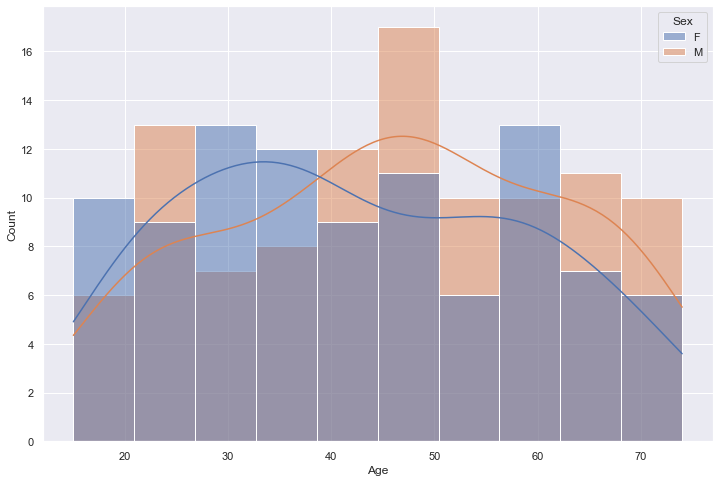

In [4]:
# a KDE plot smooths the observations with a Gaussian kernel, producing a continuous density estimate
sns.set(rc={'figure.figsize':(12,8)})
sns.histplot(data=data, x='Age', hue='Sex', kde='True', fill='True', bins=10)

# the data has approximately more males than females under around 40, and more females than males above this age

<AxesSubplot:xlabel='Age', ylabel='Count'>

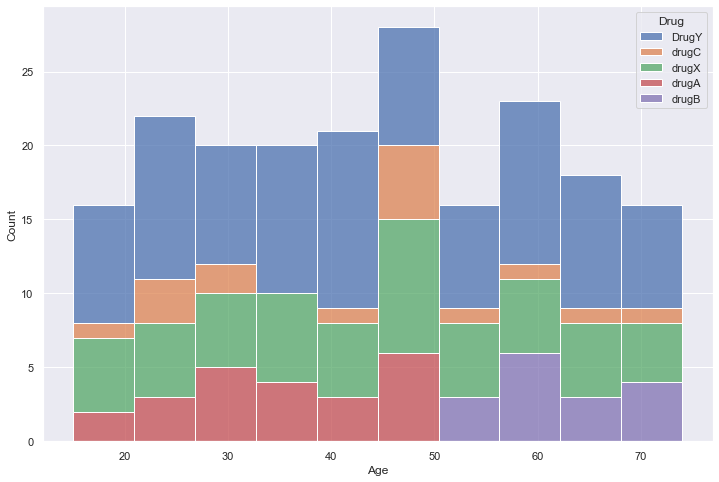

In [5]:
sns.histplot(data=data, x='Age', hue='Drug', multiple='stack', bins=10)

# from this stacked histogram, it seems like Age plays a role in choosing between drugs A and B

<AxesSubplot:xlabel='Age', ylabel='Na_to_K'>

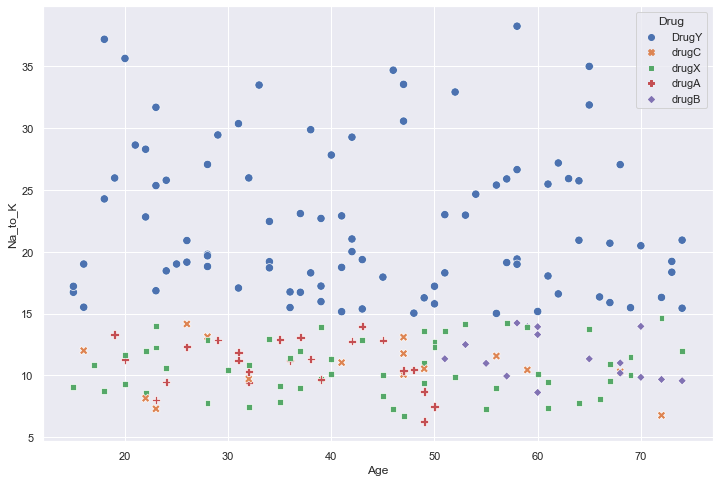

In [6]:
# some bivariate analysis using a heatmap for counts
sns.scatterplot(data=data, x='Age', y='Na_to_K', hue='Drug', style='Drug', s=70)

# note: looks like sodium to potassium ratio (15 and over) is a predictor for Drug Y
# Also we continue to confirm that Age is useful in differentiating between drugs A and B

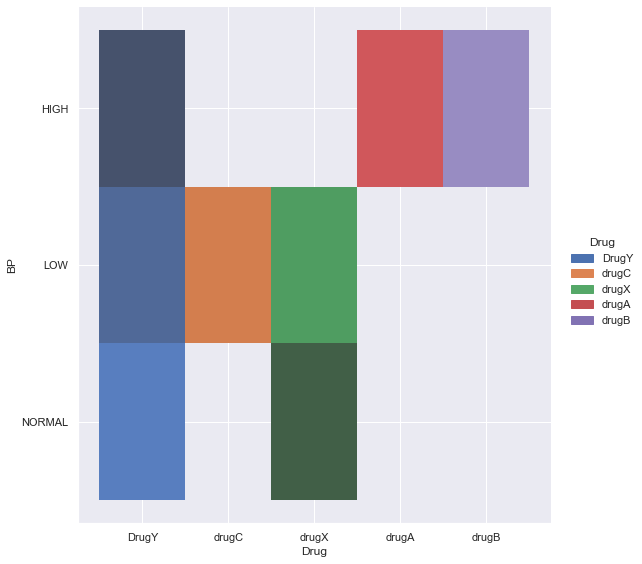

In [7]:
sns.displot(data, x='Drug', y='BP', hue='Drug', height=8, aspect=1)

# Drug A/B are only given in cases of high BP (but are not the only drugs)
# Drug C is only given in cases of low BP (but is not the only drug)
# BP can be used to differentiate between drug C and A/B. As well as drug X and A/B

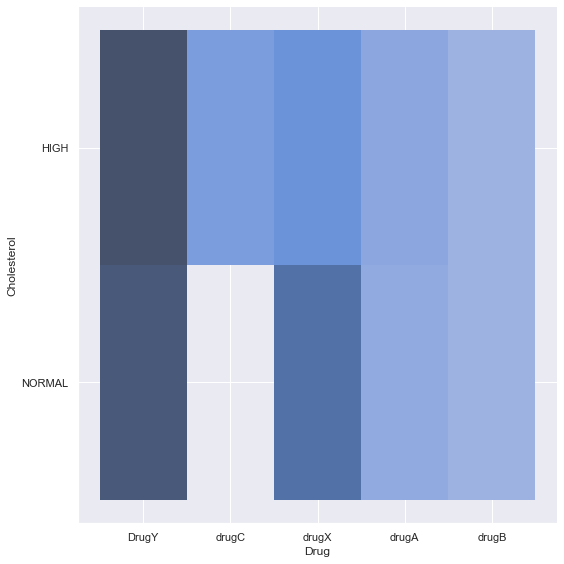

In [8]:
sns.displot(data, x='Drug', y='Cholesterol', height=8, aspect=1)

# Cholesterol on its own does not seem to be a great predictor for drugs used. We can only tell that drug C is given
# only to high cholesterol patients

<AxesSubplot:xlabel='Cholesterol', ylabel='Sex'>

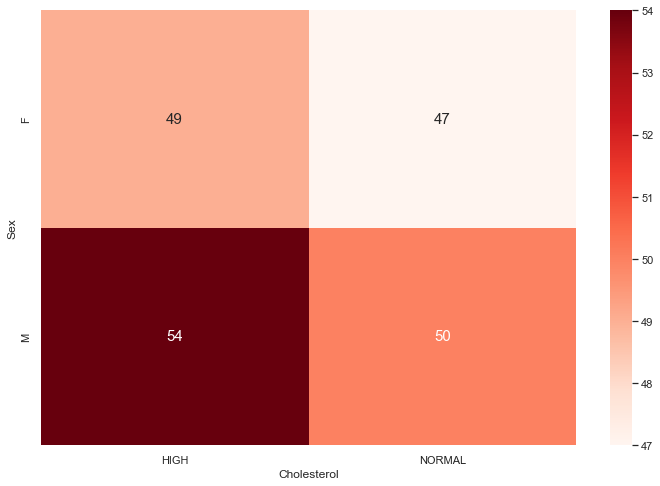

In [9]:
sns.heatmap(pd.crosstab(data.Sex, data.Cholesterol), annot=True, cmap='Reds', annot_kws={"size": 15})

<AxesSubplot:xlabel='BP', ylabel='Sex'>

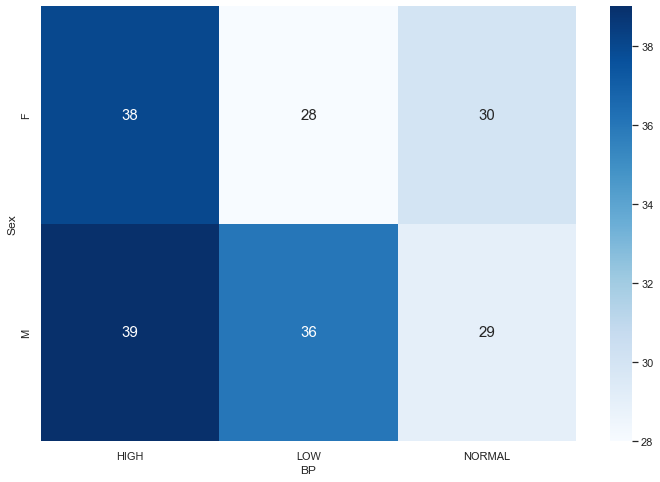

In [10]:
sns.heatmap(pd.crosstab(data.Sex, data.BP), annot=True, cmap='Blues', annot_kws={"size": 15})

<AxesSubplot:xlabel='Cholesterol', ylabel='BP'>

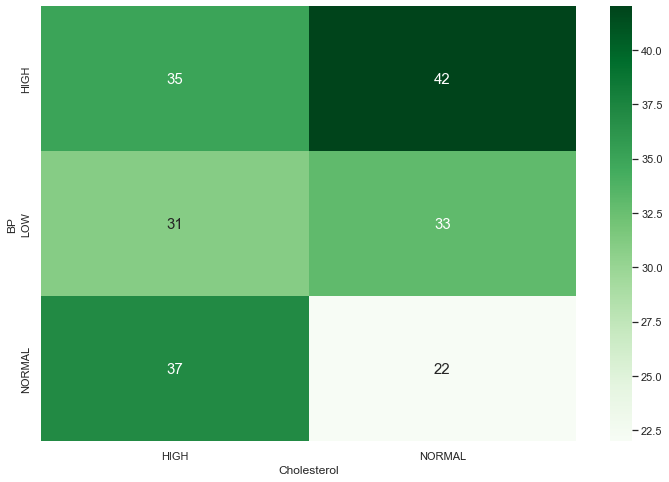

In [11]:
sns.heatmap(pd.crosstab(data.BP, data.Cholesterol), annot=True, cmap='Greens', annot_kws={"size": 15})

<AxesSubplot:xlabel='Drug', ylabel='Sex'>

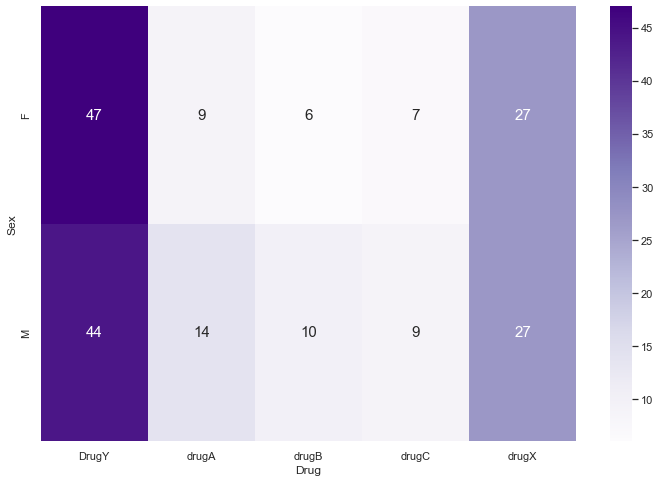

In [12]:
sns.heatmap(pd.crosstab(data.Sex, data.Drug), annot=True, cmap='Purples', annot_kws={"size": 15})

<AxesSubplot:xlabel='Drug', ylabel='BP'>

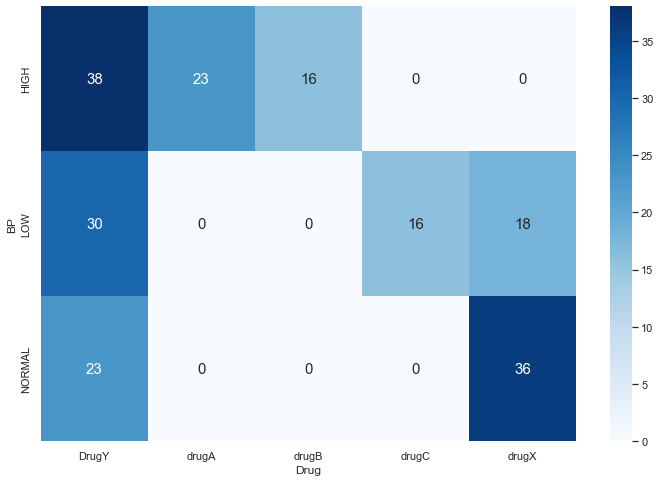

In [13]:
sns.heatmap(pd.crosstab(data.BP, data.Drug), annot=True, cmap='Blues', annot_kws={"size": 15})

<AxesSubplot:xlabel='Drug', ylabel='Cholesterol'>

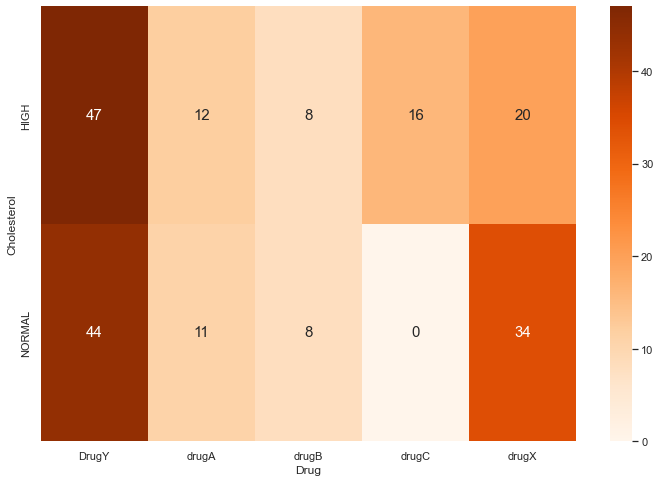

In [14]:
sns.heatmap(pd.crosstab(data.Cholesterol, data.Drug), annot=True, cmap='Oranges', annot_kws={"size": 15})